# Processamento de Texto Semântico

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [55]:
with open('/content/Shakespeare.txt', 'r') as texto:
  dados = texto.read().replace('\n', ' ')

In [56]:
dados      # Poema de Shakespeare

'"THE SONNETS  by William Shakespeare  From fairest creatures we desire increase, That thereby beauty\'s rose might never die, But as the riper should by time decease, His tender heir might bear his memory: But thou contracted to thine own bright eyes, Feed\'st thy light\'s flame with self-substantial fuel, Making a famine where abundance lies, Thy self thy foe, to thy sweet self too cruel: Thou that art now the world\'s fresh ornament, And only herald to the gaudy spring, Within thine own bud buriest thy content, And tender churl mak\'st waste in niggarding: Pity the world, or else this glutton be, To eat the world\'s due, by the grave and thee.  When forty winters shall besiege thy brow, And dig deep trenches in thy beauty\'s field, Thy youth\'s proud livery so gazed on now, Will be a tattered weed of small worth held:   Then being asked, where all thy beauty lies, Where all the treasure of thy lusty days; To say within thine own deep sunken eyes, Were an all-eating shame, and thrift

In [57]:
vec = TfidfVectorizer()
vec.fit([dados])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [58]:
vec.transform([dados]).todense()    # Calcula a proporção das palavras no texto

matrix([[0.0014624 , 0.0014624 , 0.0007312 , ..., 0.01169919, 0.0014624 ,
         0.0007312 ]])

In [59]:
proc = vec.transform([dados]).todense()

In [60]:
df = pd.DataFrame({'Proporção': proc.tolist()[0], 'Palavras': vec.get_feature_names()})
df

,Proporção,Palavras
0,0.001462,abhor
1,0.001462,abide
2,0.000731,able
3,0.000731,about
4,0.002925,above
...,...,...
3074,0.073120,your
3075,0.003656,yours
3076,0.011699,youth
3077,0.001462,youthful


# Medição do Conhecimento da Língua

## **Zipf Law**

**Tendo uma grande quantidade de palavras em um texto, a lei diz que a frequência de qualquer palavra é inversamente proporcional ao seu ranking na tabela de frequência**

**A primeira palavra aparecerá o dobro de vezes a mais do que a segunda. Aparecerá o triplo de vezes a mais do que a terceira e assim vai...**

**Quanto mais uma palavra aparece, mais chances ela tem de aparecer de novo. Ex: Vários clips amontoados. Conforme você pega, você os prende juntos. Aos poucos, a chance de você pegar os que já estão juntos, é maior**

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

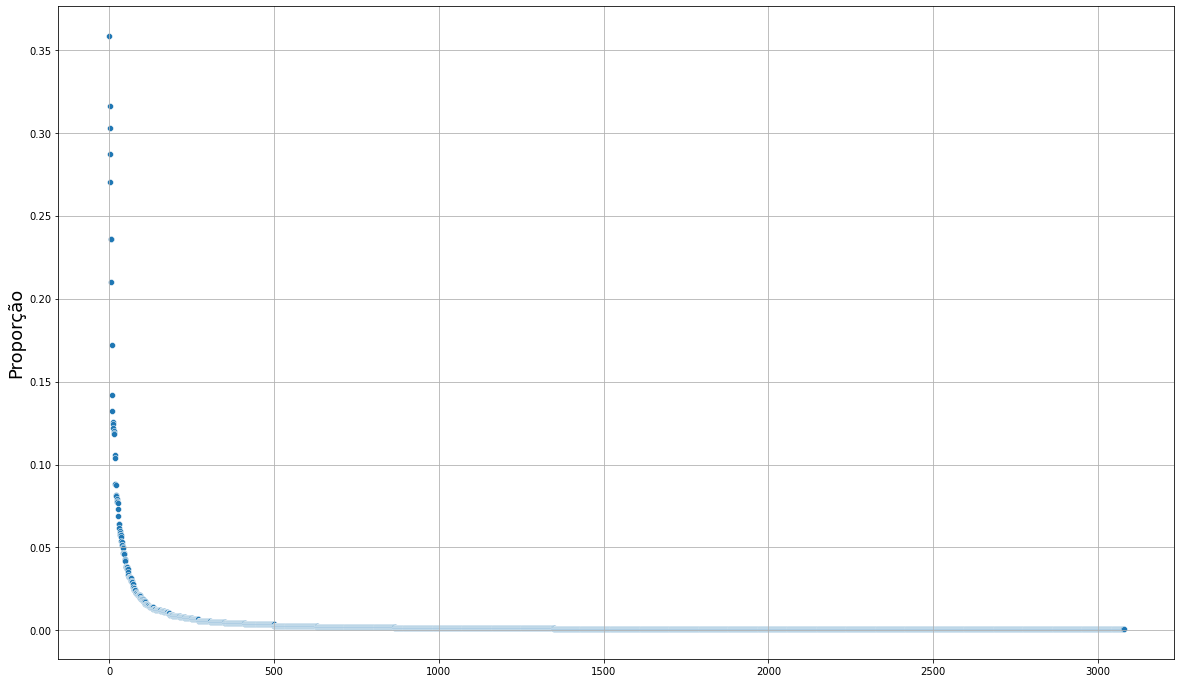

In [62]:
plt.figure(figsize=(20, 12))
plt.grid()

ax = sns.scatterplot(
    data=dados, 
    x = list(range(df.shape[0])),
    y = df.sort_values('Proporção', ascending=False)['Proporção']
)

ax.set_ylabel('Proporção', size = 18)
ax

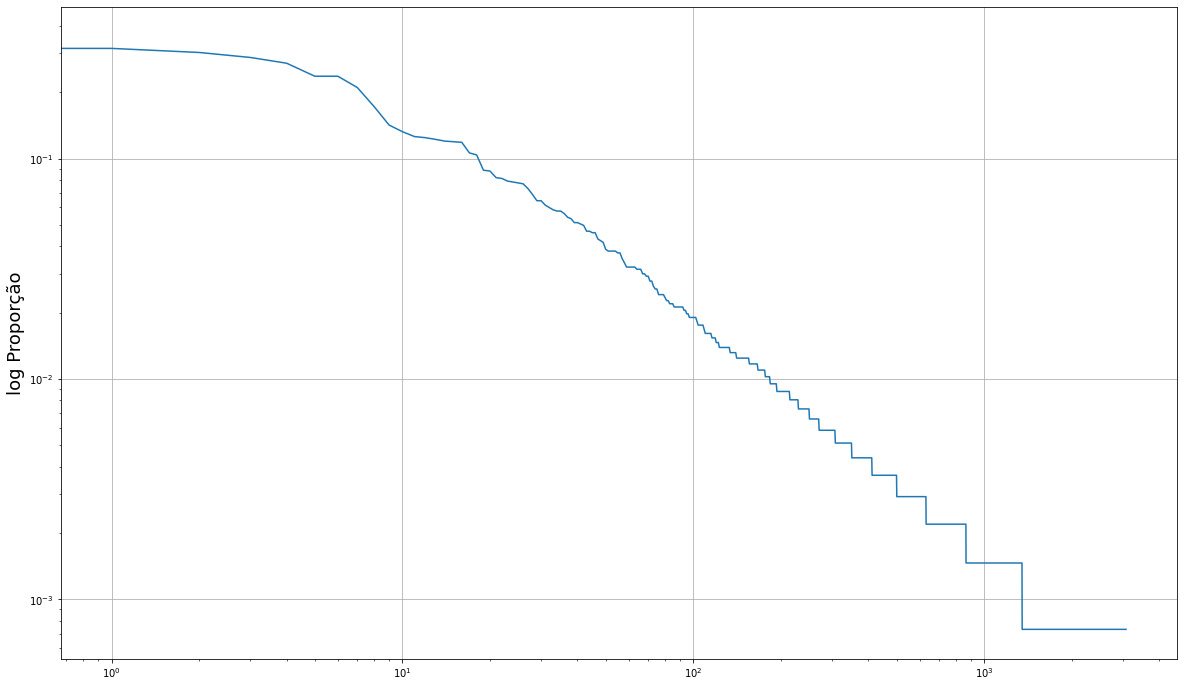

In [75]:
plt.figure(figsize=(20, 12))
plt.grid()
 
ax = sns.lineplot(
    data=dados, 
    x = list(range(df.shape[0])),
    y = df.sort_values('Proporção', ascending=False)['Proporção'],
    style = 
)
 
# Escala Logarítmica
ax.set_yscale('log')
ax.set_xscale('log')
 
ax.set_ylabel('log Proporção', size = 18)
ax

In [69]:
import plotly.graph_objects as go

In [72]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = list(range(df.shape[0])),
        y = df.sort_values('Proporção', ascending=False)['Proporção'],
        mode = "markers"
    )
)

fig.update_yaxes(type="log")
fig.update_xaxes(type="log")
fig.show()

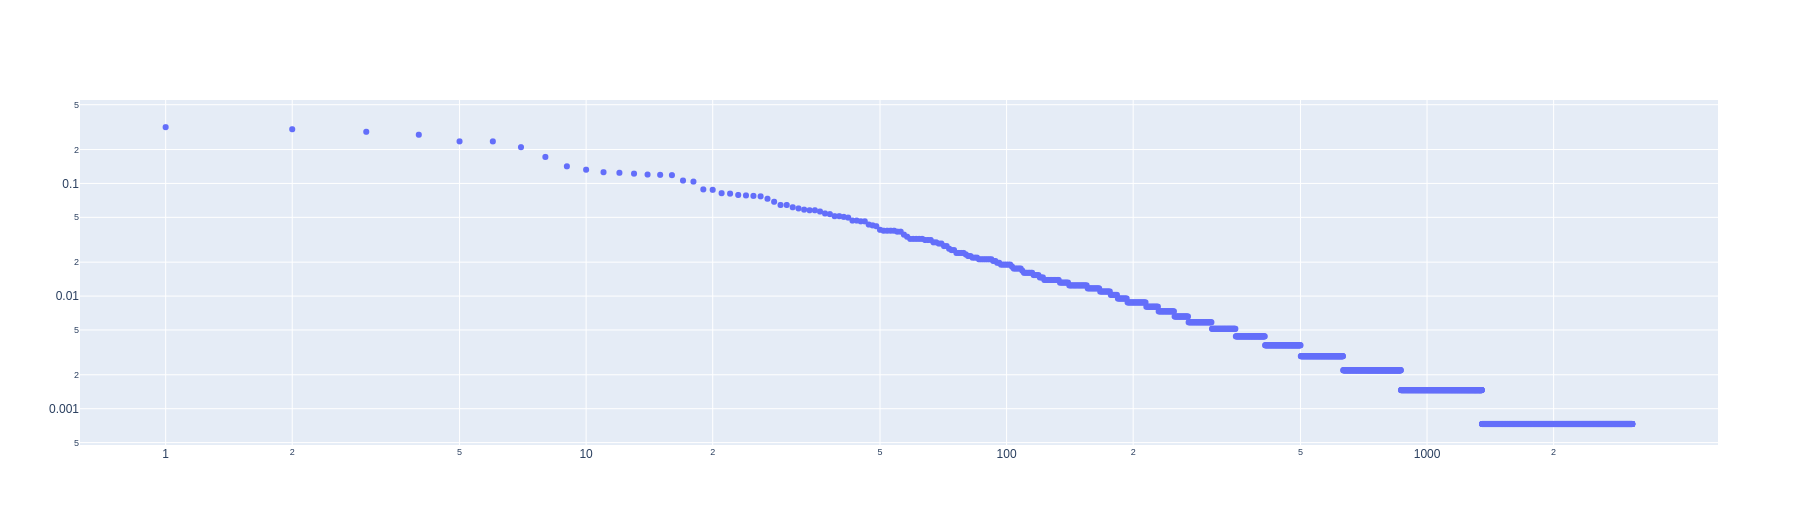

**Se uma pessoa é culta na língua dela, esta linha é de 45°**